In [1]:
import pandas as pd

In [2]:
import sys
print(sys.executable)

D:\anaconda3\envs\contest\python.exe


In [34]:
p = pd.read_csv('강원특별자치도 춘천시_버스정류장 노선정보_20240102.csv', encoding='cp949')

In [35]:
p

,노선번호,노선(ID),정류장순서,정류장(ID),정류장명,경도,위도,데이터기준일
0,1,250000100,1,250026779,장학해온채A,127.75391,37.89731,2024-01-02
1,1,250000100,2,250026778,장학교차로,127.75555,37.89383,2024-01-02
2,1,250000100,3,250026830,장학부영A,127.75278,37.89642,2024-01-02
3,1,250000100,4,250001211,후평동종점,127.74865,37.89326,2024-01-02
4,1,250000100,5,250001377,춘천기계공고,127.74898,37.89114,2024-01-02
...,...,...,...,...,...,...,...,...
15104,906(대학병원노선),250090600,127,250002125,세경3차,127.74370,37.88438,2024-01-02
15105,906(대학병원노선),250090600,128,250026643,강원도시가스,127.74792,37.88586,2024-01-02
15106,906(대학병원노선),250090600,129,250001874,정부합동청사,127.74964,37.88843,2024-01-02
15107,906(대학병원노선),250090600,130,250001378,기계공고,127.74911,37.89186,2024-01-02


In [5]:
p[p['노선번호']=='2']

,노선번호,노선(ID),정류장순서,정류장(ID),정류장명,경도,위도,데이터기준일
89,2,250000200,1,250026779,장학해온채A,127.75391,37.89731,2024-01-02
90,2,250000200,2,250026778,장학교차로,127.75555,37.89383,2024-01-02
91,2,250000200,3,250001754,강동농협장학지점,127.75321,37.89175,2024-01-02
92,2,250000200,4,250026617,공단입구,127.74988,37.89102,2024-01-02
93,2,250000200,5,250001563,도민일보,127.74479,37.89053,2024-01-02
...,...,...,...,...,...,...,...,...
170,2,250000200,82,250001375,기계공고,127.74669,37.89051,2024-01-02
171,2,250000200,83,250026618,공단입구,127.74999,37.89084,2024-01-02
172,2,250000200,84,250001753,강동농협장학지점,127.75348,37.89169,2024-01-02
173,2,250000200,85,250026917,강원고앞,127.75523,37.89519,2024-01-02


In [6]:
df = p[:3]

In [7]:
df = p

In [8]:
import pandas as pd
from geopy.geocoders import Nominatim
from tqdm import tqdm
geolocator = Nominatim(user_agent="name_of_your_app")

# tqdm 적용하여 주소 추출 함수
def get_address_with_progress(latitude, longitude):
    location = geolocator.reverse((latitude, longitude), language='ko', exactly_one=True)
    return location.address if location else None

# 데이터프레임에 주소 열 추가
addresses = []
for index, row in tqdm(df.iterrows(), total=len(df), desc="Processing"):
    address = get_address_with_progress(row['위도'], row['경도'])
    addresses.append(address)

df['주소'] = addresses

# 결과 출력
print(df[['노선번호', '노선(ID)', '정류장순서', '정류장(ID)', '정류장명', '경도', '위도', '주소', '데이터기준일']])


Processing:   0%|                                                                  | 8/15109 [00:04<2:36:40,  1.61it/s]


KeyboardInterrupt: 

In [9]:
df_chuncheon = df[df['주소'].str.contains('춘천시')]

KeyError: '주소'

In [10]:
df_chuncheon['동네'].unique()

NameError: name 'df_chuncheon' is not defined

In [11]:
df_chuncheon['동네'] = df_chuncheon['주소'].apply(extract_village)

# '동네'가 None이 아닌 행만 필터링
df_chuncheon = df_chuncheon[df_chuncheon['동네'].notna()]

NameError: name 'df_chuncheon' is not defined

In [12]:
df_chuncheon[df_chuncheon['동네']=='조양동']

NameError: name 'df_chuncheon' is not defined

In [13]:
import matplotlib.pyplot as plt
dongne_counts = df_chuncheon['동네'].value_counts()
dongne_counts[:30]

NameError: name 'df_chuncheon' is not defined

In [14]:
df['주소']

KeyError: '주소'

In [15]:
from geopy.geocoders import Nominatim

geolocator = Nominatim(user_agent="name_of_your_app")
# Geolocator 객체 생성

# 위도와 경도 정보
coordinates = [(37.89731, 127.75391), (37.89383, 127.75555)]

# 좌표를 주소로 변환
for coord in coordinates:
    location = geolocator.reverse(coord, language='ko')
    print(f"Coordinates: {coord} -> Address: {location.address}")

Coordinates: (37.89731, 127.75391) -> Address: 춘천순환로, 장학리, 춘천시, 강원특별자치도, 24210, 대한민국
Coordinates: (37.89383, 127.75555) -> Address: 장학교차로, 춘천순환로, 장학리, 춘천시, 강원특별자치도, 24209, 대한민국


In [16]:
import pandas as pd 
data = pd.read_csv('강원도 춘천시_관광지 및 상권 정밀 위치기반 이용자 실태 현황_20211221.csv', encoding='cp949')

In [17]:
data

,상호명,날짜,업종,위도,경도,시도,시군구,읍면동,이용자수,남성비율,여성비율,10대비율,20대비율,30대비율,40대비율,50대이상비율,데이터기준일
0,(주)화천레미콘,2021-07-19,기타시설,37.851783,127.750995,강원,춘천시,석사동,551,26.17,73.83,0.97,2.47,1.36,4.14,91.06,2021-12-21
1,여의도순복음춘천교회,2021-07-19,종교시설,37.849759,127.755033,강원,춘천시,동내면 거두리,79,42.50,57.50,13.22,18.84,25.55,21.69,20.70,2021-12-21
2,디자인카페티이오,2021-07-19,카페,37.884288,127.728886,강원,춘천시,요선동,95,46.24,53.76,13.52,20.90,21.89,21.74,21.95,2021-12-21
3,브이스페이스(VSpace),2021-07-19,카페,37.815480,127.716347,강원,춘천시,신동면 증리,72,55.17,44.83,10.38,20.74,20.02,22.26,26.60,2021-12-21
4,오꼬만봄내점,2021-07-19,음식점,37.855721,127.745546,강원,춘천시,석사동,315,28.96,71.04,15.33,21.03,19.13,22.74,21.77,2021-12-21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
984657,블랙박스,2021-11-17,의류판매,37.879256,127.728921,강원,춘천시,조양동,61713,46.29,53.71,27.70,17.58,17.61,15.24,21.87,2021-12-21
984658,뉴욕바닷가재,2021-11-17,음식점,37.841142,127.766668,강원,춘천시,동내면 사암리,71,54.29,45.71,14.88,18.76,22.37,21.64,22.35,2021-12-21
984659,봄시내재가노인복지센터,2021-11-17,기타시설,37.881195,127.759578,강원,춘천시,동면 만천리,97,54.30,45.70,16.68,15.44,22.66,25.20,20.02,2021-12-21
984660,춘천2번지닭갈비,2021-11-17,음식점,37.852734,127.747395,강원,춘천시,석사동,126,22.43,77.57,14.71,20.51,18.51,25.04,21.23,2021-12-21


In [18]:
data[data['경도'] == 127.7234127]

,상호명,날짜,업종,위도,경도,시도,시군구,읍면동,이용자수,남성비율,여성비율,10대비율,20대비율,30대비율,40대비율,50대이상비율,데이터기준일


In [19]:
grouped = data.groupby('읍면동')['이용자수'].sum()

In [20]:
# Find the 읍면동 with the highest 이용자수
max_usage_location = grouped.idxmax()
max_usage_value = grouped.max()


In [21]:
grouped = data.groupby('읍면동')['이용자수'].sum().sort_values(ascending=False)

In [22]:
grouped[:7]

읍면동
석사동       208948202
조양동       180090361
요선동       132292275
중앙로2가      70397052
퇴계동        38212566
동면 만천리     37572047
효자동        26210351
Name: 이용자수, dtype: int64

In [23]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

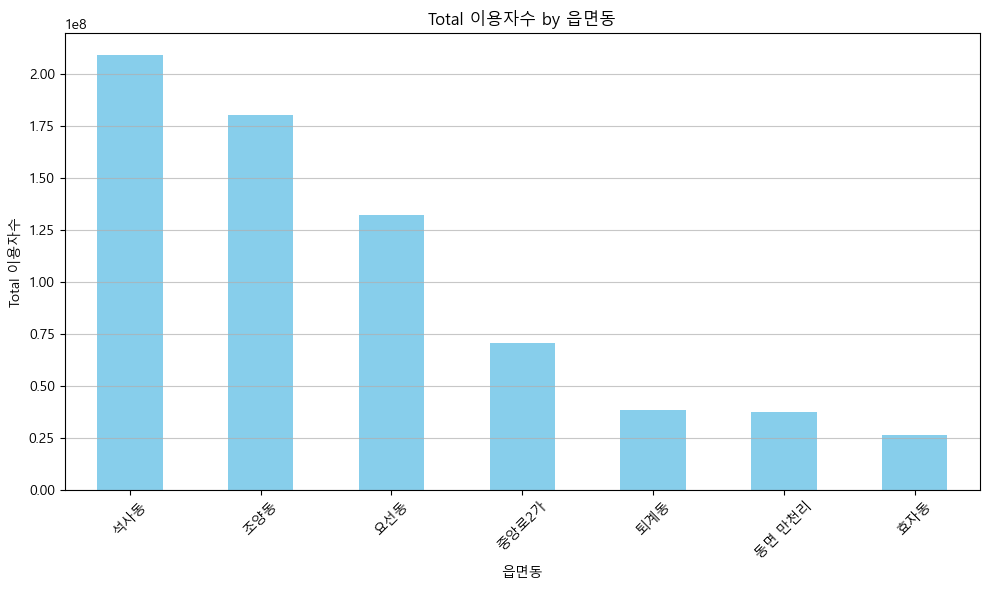

In [24]:
plt.figure(figsize=(10, 6))  # Set the figure size

# Create the bar plot
grouped[:7].plot(kind='bar', color='skyblue')

# Set the title and labels
plt.title('Total 이용자수 by 읍면동')
plt.xlabel('읍면동')
plt.ylabel('Total 이용자수')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Add a grid for the y-axis
plt.grid(axis='y', alpha=0.7)

# Adjust layout to ensure everything fits without overlapping
plt.tight_layout()

# Show the plot
plt.show()

In [25]:
q = data[data['읍면동']=='효자동']
q

,상호명,날짜,업종,위도,경도,시도,시군구,읍면동,이용자수,남성비율,여성비율,10대비율,20대비율,30대비율,40대비율,50대이상비율,데이터기준일
5,짝모텔,2021-07-19,숙박시설,37.876267,127.734751,강원,춘천시,효자동,236,59.00,41.00,7.84,22.45,10.09,29.91,29.71,2021-12-21
24,구철회내과,2021-07-19,병의원,37.876094,127.735321,강원,춘천시,효자동,236,51.98,48.02,13.56,21.12,22.09,22.55,20.68,2021-12-21
28,야베스선교 갤러리,2021-07-19,종교시설,37.875434,127.738142,강원,춘천시,효자동,79,51.24,48.76,13.56,21.08,22.64,23.03,19.69,2021-12-21
38,신낙지마루,2021-07-19,음식점,37.874758,127.743333,강원,춘천시,효자동,100,35.41,64.59,13.08,20.58,23.48,21.11,21.75,2021-12-21
39,물안개,2021-07-19,호프/맥주,37.869976,127.725716,강원,춘천시,효자동,630,55.16,44.84,8.84,16.27,24.01,25.99,24.89,2021-12-21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
984600,모이레스토랑,2021-11-17,호프/맥주,37.864270,127.736021,강원,춘천시,효자동,127,56.73,43.27,9.20,16.28,24.75,25.25,24.52,2021-12-21
984602,니드헤어,2021-11-17,이미용업,37.874410,127.741066,강원,춘천시,효자동,126,58.37,41.63,12.09,19.88,22.76,24.33,20.94,2021-12-21
984603,철학실천센터 필리아,2021-11-17,기타시설,37.876212,127.735387,강원,춘천시,효자동,63,58.37,41.63,12.09,19.88,22.76,24.33,20.94,2021-12-21
984618,락휴코인노래방,2021-11-17,노래연습실,37.873774,127.743750,강원,춘천시,효자동,102,44.97,55.03,13.72,21.02,21.73,21.61,21.92,2021-12-21


In [26]:
q[q['상호명'] == '구철회내과']

,상호명,날짜,업종,위도,경도,시도,시군구,읍면동,이용자수,남성비율,여성비율,10대비율,20대비율,30대비율,40대비율,50대이상비율,데이터기준일
24,구철회내과,2021-07-19,병의원,37.876094,127.735321,강원,춘천시,효자동,236,51.98,48.02,13.56,21.12,22.09,22.55,20.68,2021-12-21
12263,구철회내과,2021-07-20,병의원,37.876094,127.735321,강원,춘천시,효자동,79,50.35,49.65,13.88,21.44,20.80,21.58,22.30,2021-12-21
23169,구철회내과,2021-07-21,병의원,37.876094,127.735321,강원,춘천시,효자동,78,52.67,47.33,13.45,21.01,22.54,22.89,20.11,2021-12-21
30974,구철회내과,2021-07-22,병의원,37.876094,127.735321,강원,춘천시,효자동,227,49.72,50.28,13.56,21.12,22.10,22.56,20.66,2021-12-21
36851,구철회내과,2021-07-23,병의원,37.876094,127.735321,강원,춘천시,효자동,78,52.76,47.24,13.80,21.36,21.13,21.83,21.88,2021-12-21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
946394,구철회내과,2021-11-13,병의원,37.876094,127.735321,강원,춘천시,효자동,141,44.94,55.06,13.11,20.58,23.27,21.44,21.60,2021-12-21
955452,구철회내과,2021-11-14,병의원,37.876094,127.735321,강원,춘천시,효자동,64,55.39,44.61,12.97,20.62,22.30,22.59,21.52,2021-12-21
962380,구철회내과,2021-11-15,병의원,37.876094,127.735321,강원,춘천시,효자동,130,53.25,46.75,13.77,20.89,21.22,21.78,22.34,2021-12-21
975967,구철회내과,2021-11-16,병의원,37.876094,127.735321,강원,춘천시,효자동,129,57.98,42.02,12.11,19.76,22.75,24.47,20.91,2021-12-21


In [27]:
data_1 = data[data['읍면동']=='석사동']

In [28]:
data_1 

,상호명,날짜,업종,위도,경도,시도,시군구,읍면동,이용자수,남성비율,여성비율,10대비율,20대비율,30대비율,40대비율,50대이상비율,데이터기준일
0,(주)화천레미콘,2021-07-19,기타시설,37.851783,127.750995,강원,춘천시,석사동,551,26.17,73.83,0.97,2.47,1.36,4.14,91.06,2021-12-21
4,오꼬만봄내점,2021-07-19,음식점,37.855721,127.745546,강원,춘천시,석사동,315,28.96,71.04,15.33,21.03,19.13,22.74,21.77,2021-12-21
6,호반중고백화점,2021-07-19,기타시설,37.862024,127.741778,강원,춘천시,석사동,96,51.14,48.86,15.41,21.06,19.33,22.36,21.84,2021-12-21
7,어백정,2021-07-19,음식점,37.854507,127.746757,강원,춘천시,석사동,171,50.56,49.44,15.31,21.34,19.63,21.86,21.86,2021-12-21
9,큰집닭강정춘천점,2021-07-19,음식점,37.860355,127.743021,강원,춘천시,석사동,158,49.17,50.83,15.83,21.39,19.73,20.82,22.23,2021-12-21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
984643,춘천신용협동조합(석사동),2021-11-17,기타시설,37.856520,127.742615,강원,춘천시,석사동,63,58.04,41.96,14.71,20.51,18.51,25.04,21.23,2021-12-21
984649,디톡스족욕힐링숲라파석사점,2021-11-17,기타시설,37.867590,127.755099,강원,춘천시,석사동,885,25.77,74.23,14.71,20.51,18.51,25.04,21.23,2021-12-21
984652,주문진게먹고회먹고,2021-11-17,음식점,37.848377,127.750980,강원,춘천시,석사동,92,53.85,46.15,15.73,21.43,19.51,21.85,21.48,2021-12-21
984653,유명한약국,2021-11-17,약국,37.867405,127.753427,강원,춘천시,석사동,316,53.63,46.37,14.71,20.51,18.51,25.04,21.23,2021-12-21


In [29]:
data_1.sort_values(by='20대비율', ascending=False)[:40]

,상호명,날짜,업종,위도,경도,시도,시군구,읍면동,이용자수,남성비율,여성비율,10대비율,20대비율,30대비율,40대비율,50대이상비율,데이터기준일
103603,더블유 인테리어,2021-07-31,기타시설,37.863981,127.751018,강원,춘천시,석사동,73,71.59,28.41,0.00,100.00,0.00,0.00,0.00,2021-12-21
102310,겜잡이PC방,2021-07-31,게임제공시설,37.867037,127.752056,강원,춘천시,석사동,73,73.36,26.64,0.00,100.00,0.00,0.00,0.00,2021-12-21
104904,건설기계안전기술연구원,2021-07-31,기타시설,37.846352,127.754157,강원,춘천시,석사동,73,72.75,27.25,0.00,100.00,0.00,0.00,0.00,2021-12-21
99595,희망의일터,2021-07-31,기타시설,37.846158,127.754329,강원,춘천시,석사동,73,72.75,27.25,0.00,100.00,0.00,0.00,0.00,2021-12-21
98125,아름다운 식당,2021-07-31,음식점,37.864189,127.750916,강원,춘천시,석사동,73,72.92,27.08,0.00,66.67,0.00,0.00,33.33,2021-12-21
101288,홍익돈까스,2021-07-31,음식점,37.853273,127.745733,강원,춘천시,석사동,146,72.78,27.22,0.00,50.00,50.00,0.00,0.00,2021-12-21
104412,풀무원녹즙,2021-07-31,기타시설,37.860681,127.739468,강원,춘천시,석사동,73,72.87,27.13,0.00,50.00,0.00,0.00,50.00,2021-12-21
103880,범수네옷수선,2021-07-31,기타시설,37.861011,127.739439,강원,춘천시,석사동,73,72.87,27.13,0.00,50.00,0.00,0.00,50.00,2021-12-21
103875,건국우유,2021-07-31,기타시설,37.861046,127.739422,강원,춘천시,석사동,73,72.87,27.13,0.00,50.00,0.00,0.00,50.00,2021-12-21
97703,착한반찬,2021-07-31,음식점,37.860791,127.739336,강원,춘천시,석사동,73,72.87,27.13,0.00,50.00,0.00,0.00,50.00,2021-12-21


In [30]:
data_1['이용자수'].mean()

821.040354903101

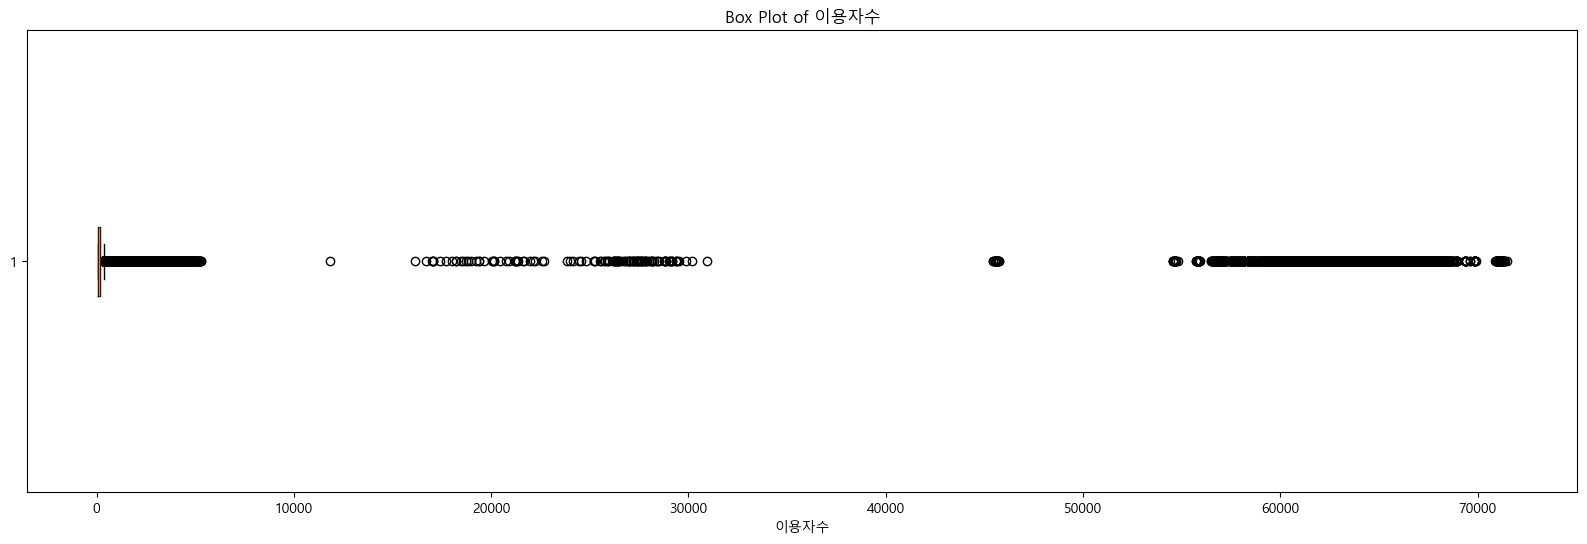

In [31]:
plt.figure(figsize=(20, 6))
plt.boxplot(data_1['이용자수'], vert=False)
plt.title('Box Plot of 이용자수')
plt.xlabel('이용자수')
plt.show()

In [32]:
data_most = data_1.sort_values(by='이용자수', ascending=False)[:30000]

In [33]:
import folium
from folium.plugins import MarkerCluster

# 첫 번째 데이터셋
map_center = [data_most['위도'].mean(), data_most['경도'].mean()]
mymap = folium.Map(location=map_center, zoom_start=10)

# 마커 클러스터링 추가
marker_cluster = MarkerCluster().add_to(mymap)

# 첫 번째 데이터셋의 마커 (기본 색상)
for index, row in data_most.iterrows():
    popup = folium.Popup(row['상호명'], parse_html=True)
    folium.Marker([row['위도'], row['경도']], popup=popup).add_to(marker_cluster)

# 지도를 표시
mymap

KeyboardInterrupt: 

In [ ]:
data_2 = data[data['읍면동']=='조양동']

In [ ]:
data_jo = data_2.sort_values(by='이용자수', ascending=False)[:30000]

In [ ]:
import folium
from folium.plugins import MarkerCluster

# 첫 번째 데이터셋
map_center = [data_jo['위도'].mean(), data_jo['경도'].mean()]
mymap = folium.Map(location=map_center, zoom_start=10)

# 마커 클러스터링 추가
marker_cluster = MarkerCluster().add_to(mymap)

# 첫 번째 데이터셋의 마커 (기본 색상)
for index, row in data_jo.iterrows():
    popup = folium.Popup(row['상호명'], parse_html=True)
    folium.Marker([row['위도'], row['경도']], popup=popup).add_to(marker_cluster)

# 지도를 표시
mymap


In [ ]:
df = data_1 

In [117]:
df

,상호명,날짜,업종,위도,경도,시도,시군구,읍면동,이용자수,남성비율,여성비율,10대비율,20대비율,30대비율,40대비율,50대이상비율,데이터기준일
0,(주)화천레미콘,2021-07-19,기타시설,37.851783,127.750995,강원,춘천시,석사동,551,26.17,73.83,0.97,2.47,1.36,4.14,91.06,2021-12-21
4,오꼬만봄내점,2021-07-19,음식점,37.855721,127.745546,강원,춘천시,석사동,315,28.96,71.04,15.33,21.03,19.13,22.74,21.77,2021-12-21
6,호반중고백화점,2021-07-19,기타시설,37.862024,127.741778,강원,춘천시,석사동,96,51.14,48.86,15.41,21.06,19.33,22.36,21.84,2021-12-21
7,어백정,2021-07-19,음식점,37.854507,127.746757,강원,춘천시,석사동,171,50.56,49.44,15.31,21.34,19.63,21.86,21.86,2021-12-21
9,큰집닭강정춘천점,2021-07-19,음식점,37.860355,127.743021,강원,춘천시,석사동,158,49.17,50.83,15.83,21.39,19.73,20.82,22.23,2021-12-21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
984643,춘천신용협동조합(석사동),2021-11-17,기타시설,37.856520,127.742615,강원,춘천시,석사동,63,58.04,41.96,14.71,20.51,18.51,25.04,21.23,2021-12-21
984649,디톡스족욕힐링숲라파석사점,2021-11-17,기타시설,37.867590,127.755099,강원,춘천시,석사동,885,25.77,74.23,14.71,20.51,18.51,25.04,21.23,2021-12-21
984652,주문진게먹고회먹고,2021-11-17,음식점,37.848377,127.750980,강원,춘천시,석사동,92,53.85,46.15,15.73,21.43,19.51,21.85,21.48,2021-12-21
984653,유명한약국,2021-11-17,약국,37.867405,127.753427,강원,춘천시,석사동,316,53.63,46.37,14.71,20.51,18.51,25.04,21.23,2021-12-21


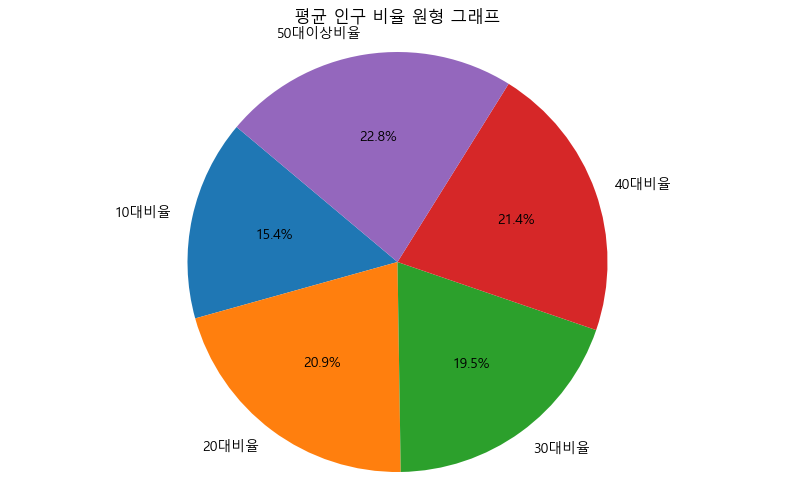

In [118]:
mean_10대비율 = df['10대비율'].mean()
mean_20대비율 = df['20대비율'].mean()
mean_30대비율 = df['30대비율'].mean()
mean_40대비율 = df['40대비율'].mean()
mean_50대이상비율 = df['50대이상비율'].mean()

# 평균 데이터를 리스트로 정리
labels = ['10대비율', '20대비율', '30대비율', '40대비율', '50대이상비율']
sizes = [mean_10대비율, mean_20대비율, mean_30대비율, mean_40대비율, mean_50대이상비율]

# 원형 그래프 그리기
plt.figure(figsize=(10, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)

plt.title('평균 인구 비율 원형 그래프')
plt.axis('equal')  # 원형을 유지하기 위해서
plt.show()

In [109]:
df_sorted = df.sort_values(by='이용자수', ascending=False)

# 각 행에서 인구 비율 컬럼 중 최대 비율과 해당 컬럼명을 선택
age_columns = ['10대비율', '20대비율', '30대비율', '40대비율', '50대이상비율']
df_sorted['최고비율'] = df_sorted[age_columns].max(axis=1)
df_sorted['최고비율_컬럼'] = df_sorted[age_columns].idxmax(axis=1)

# 필요한 컬럼과 새로 만든 최고 비율 컬럼으로 데이터프레임 생성
df_result = df_sorted[['상호명', '이용자수', '최고비율_컬럼', '최고비율']]

# 컬럼명 변경
df_result.columns = ['상호명', '이용자수', '인구비율', '비율']

# 결과 출력
print(df_result)

                상호명   이용자수     인구비율     비율
42829   한국타이어 석사대리점  71487    10대비율  31.93
44466           퀸네일  71410    10대비율  32.93
40908          동경포차  71332    10대비율  30.53
45117         공간꾸미기  71332    10대비율  30.57
46098           복다방  71332    10대비율  30.41
...             ...    ...      ...    ...
900908       차이나게이트     62  50대이상비율  22.39
900951      이정아줌바댄스     62    20대비율  22.09
901023    리듬오카리나앙상블     62  50대이상비율  22.31
901037          화월비     62    40대비율  22.65
897107      토마스요양병원     62  50대이상비율  21.99

[254492 rows x 4 columns]


In [113]:
df = df_result

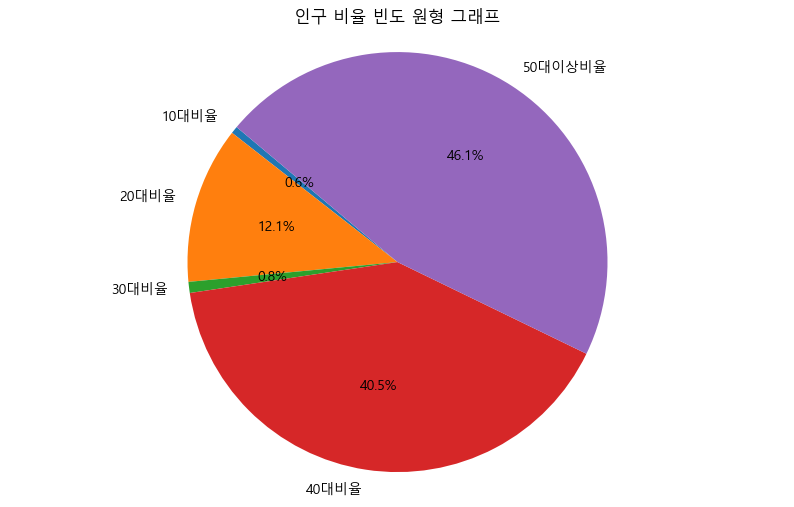

In [115]:
# 각 인구비율의 빈도 계산
count_10대 = (df['인구비율'] == '10대비율').sum()
count_20대 = (df['인구비율'] == '20대비율').sum()
count_30대 = (df['인구비율'] == '30대비율').sum()
count_40대 = (df['인구비율'] == '40대비율').sum()
count_50대이상 = (df['인구비율'] == '50대이상비율').sum()

# 빈도 데이터를 리스트로 정리
labels = ['10대비율', '20대비율', '30대비율', '40대비율', '50대이상비율']
sizes = [count_10대, count_20대, count_30대, count_40대, count_50대이상]

# 원형 그래프 그리기
plt.figure(figsize=(10, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)

plt.title('인구 비율 빈도 원형 그래프')
plt.axis('equal')  # 원형을 유지하기 위해서
plt.show()

In [95]:
data_s = data[data['읍면동']=='조양동']

In [97]:
data_s.sort_values(by='이용자수', ascending=False)[:2550]

,상호명,날짜,업종,위도,경도,시도,시군구,읍면동,이용자수,남성비율,여성비율,10대비율,20대비율,30대비율,40대비율,50대이상비율,데이터기준일
41253,VALENCIA,2021-07-24,의류판매,37.878549,127.728917,강원,춘천시,조양동,74511,47.32,52.68,27.42,17.95,19.69,17.45,17.49,2021-12-21
41948,KL,2021-07-24,의류판매,37.878510,127.728818,강원,춘천시,조양동,74511,47.35,52.65,24.70,18.63,20.37,18.13,18.17,2021-12-21
609720,KL,2021-10-02,의류판매,37.878510,127.728818,강원,춘천시,조양동,74078,42.38,57.62,20.14,18.39,21.15,19.94,20.38,2021-12-21
612465,VALENCIA,2021-10-02,의류판매,37.878549,127.728917,강원,춘천시,조양동,74078,42.75,57.25,18.07,18.90,21.67,20.46,20.90,2021-12-21
949525,VALENCIA,2021-11-13,의류판매,37.878549,127.728917,강원,춘천시,조양동,72344,46.19,53.81,15.23,22.36,22.10,22.47,17.84,2021-12-21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
511798,재즈,2021-09-20,의류판매,37.879416,127.728768,강원,춘천시,조양동,58591,53.83,46.17,3.84,23.89,23.68,24.09,24.50,2021-12-21
508938,애플,2021-09-20,의류판매,37.879033,127.729003,강원,춘천시,조양동,58591,52.97,47.03,6.29,24.20,22.45,23.17,23.89,2021-12-21
509971,지퍼올려,2021-09-20,의류판매,37.878975,127.729049,강원,춘천시,조양동,58591,52.94,47.06,6.06,24.16,22.58,23.26,23.94,2021-12-21
515301,히데,2021-09-20,의류판매,37.878933,127.729174,강원,춘천시,조양동,58591,53.91,46.09,3.68,23.87,23.76,24.15,24.54,2021-12-21


In [98]:
import folium
from folium.plugins import MarkerCluster

# 첫 번째 데이터셋
map_center = [data_s.sort_values(by='이용자수', ascending=False)[:2550]['위도'].mean(), data_s.sort_values(by='이용자수', ascending=False)[:2550]['경도'].mean()]
mymap = folium.Map(location=map_center, zoom_start=10)

# 마커 클러스터링 추가
marker_cluster = MarkerCluster().add_to(mymap)

# 첫 번째 데이터셋의 마커 (기본 색상)
for index, row in data_s.sort_values(by='이용자수', ascending=False)[:2550].iterrows():
    popup = folium.Popup(row['상호명'], parse_html=True)
    folium.Marker([row['위도'], row['경도']], popup=popup).add_to(marker_cluster)

# 지도를 표시
mymap


In [36]:
p

,노선번호,노선(ID),정류장순서,정류장(ID),정류장명,경도,위도,데이터기준일
0,1,250000100,1,250026779,장학해온채A,127.75391,37.89731,2024-01-02
1,1,250000100,2,250026778,장학교차로,127.75555,37.89383,2024-01-02
2,1,250000100,3,250026830,장학부영A,127.75278,37.89642,2024-01-02
3,1,250000100,4,250001211,후평동종점,127.74865,37.89326,2024-01-02
4,1,250000100,5,250001377,춘천기계공고,127.74898,37.89114,2024-01-02
...,...,...,...,...,...,...,...,...
15104,906(대학병원노선),250090600,127,250002125,세경3차,127.74370,37.88438,2024-01-02
15105,906(대학병원노선),250090600,128,250026643,강원도시가스,127.74792,37.88586,2024-01-02
15106,906(대학병원노선),250090600,129,250001874,정부합동청사,127.74964,37.88843,2024-01-02
15107,906(대학병원노선),250090600,130,250001378,기계공고,127.74911,37.89186,2024-01-02


In [37]:
import folium
from folium.plugins import MarkerCluster

# 첫 번째 데이터셋
map_center = [p['위도'].mean(), p['경도'].mean()]
mymap = folium.Map(location=map_center, zoom_start=10)

# 마커 클러스터링 추가
marker_cluster = MarkerCluster().add_to(mymap)

# 첫 번째 데이터셋의 마커 (기본 색상)
for index, row in p.iterrows():
    popup = folium.Popup(row['정류장명'], parse_html=True)
    folium.Marker([row['위도'], row['경도']], popup=popup).add_to(marker_cluster)

# 지도를 표시
mymap


KeyboardInterrupt: 

In [38]:
result = p[p['노선번호'].isin(['100', '100-1','101','200','200-1','300','400'])]

In [39]:
result

,노선번호,노선(ID),정류장순서,정류장(ID),정류장명,경도,위도,데이터기준일
2947,100,250010000,1,250001211,후평동종점,127.74865,37.89326,2024-01-02
2948,100,250010000,2,250026618,공단입구,127.74999,37.89084,2024-01-02
2949,100,250010000,3,250001753,강동농협장학지점,127.75348,37.89169,2024-01-02
2950,100,250010000,4,250026917,강원고앞,127.75523,37.89519,2024-01-02
2951,100,250010000,5,265000700,장학해온채A,127.75381,37.89828,2024-01-02
...,...,...,...,...,...,...,...,...
3423,400,250040000,58,250026912,하일입구,127.75223,37.91401,2024-01-02
3424,400,250040000,59,250026909,로컬푸드직매장,127.75090,37.91968,2024-01-02
3425,400,250040000,60,250001363,춘천한샘고등학교,127.75110,37.92521,2024-01-02
3426,400,250040000,61,250002056,신북읍행복센터,127.74702,37.92530,2024-01-02


In [42]:
import folium

df = result
# 지도 중심을 데이터의 평균 위도와 경도로 설정
map_center = [df['위도'].mean(), df['경도'].mean()]
mymap = folium.Map(location=map_center, zoom_start=13)

# 노선번호별로 그룹화하여 각 노선을 다른 색상으로 표시
colors = ['red', 'blue', 'green', 'purple', 'orange', 'darkred', 
          'lightred', 'beige', 'darkblue', 'darkgreen', 'cadetblue', 
          'darkpurple', 'white', 'pink', 'lightblue', 'lightgreen', 
          'gray', 'black', 'lightgray']

# 노선번호별로 데이터를 그룹화
color_map = {}
for i, (route, group) in enumerate(df.groupby('노선번호')):
    # 위도와 경도를 리스트로 변환
    locations = group[['위도', '경도']].values.tolist()
    
    # PolyLine으로 각 노선을 그리기
    color = colors[i % len(colors)]
    folium.PolyLine(locations, color=color, weight=2, opacity=0.7).add_to(mymap)
    color_map[route] = color

    # 각 정류장에 마커 추가


# 지도를 표시
for route, color in color_map.items():
    print(f"노선번호: {route}, 색상: {color}")

노선번호: 100, 색상: red
노선번호: 100-1, 색상: blue
노선번호: 200, 색상: green
노선번호: 200-1, 색상: purple
노선번호: 300, 색상: orange
노선번호: 400, 색상: darkred


In [43]:
mymap

In [50]:
result_2 = p[p['노선번호'].isin(['1', '2','3','4','6','7','7-1','7-2','7-3','8','8-1','9','10','10-1','11','12','13','13-1','14','15','16','16-1',
                            '17','18'])]

In [51]:
result_2

,노선번호,노선(ID),정류장순서,정류장(ID),정류장명,경도,위도,데이터기준일,주소
0,1,250000100,1,250026779,장학해온채A,127.75391,37.89731,2024-01-02,"춘천순환로, 장학리, 춘천시, 강원특별자치도, 24210, 대한민국"
1,1,250000100,2,250026778,장학교차로,127.75555,37.89383,2024-01-02,"장학교차로, 춘천순환로, 장학리, 춘천시, 강원특별자치도, 24209, 대한민국"
2,1,250000100,3,250026830,장학부영A,127.75278,37.89642,2024-01-02,"장학리, 춘천시, 강원특별자치도, 24209, 대한민국"
3,1,250000100,4,250001211,후평동종점,127.74865,37.89326,2024-01-02,"공단로, 만천리, 춘천시, 강원특별자치도, 24232, 대한민국"
4,1,250000100,5,250001377,춘천기계공고,127.74898,37.89114,2024-01-02,"춘천기계공고, 공단로, 만천리, 춘천시, 강원특별자치도, 24232, 대한민국"
...,...,...,...,...,...,...,...,...,...
2942,17,250001700,54,250026690,만천주공A,127.75937,37.88423,2024-01-02,"만천주공A, 후석로326번길, 만천리, 춘천시, 강원특별자치도, 24215, 대한민국"
2943,17,250001700,55,250026920,춘천여고앞,127.76172,37.88615,2024-01-02,"만천리, 춘천시, 강원특별자치도, 24213, 대한민국"
2944,17,250001700,56,250026919,아이파크A,127.75754,37.89054,2024-01-02,"아이파크A, 춘천순환로, 만천리, 춘천시, 강원특별자치도, 24213, 대한민국"
2945,17,250001700,57,250026917,강원고앞,127.75523,37.89519,2024-01-02,"강원고앞, 춘천순환로, 장학리, 춘천시, 강원특별자치도, 24210, 대한민국"


In [52]:
import folium

df = result_2
# 지도 중심을 데이터의 평균 위도와 경도로 설정
map_center = [df['위도'].mean(), df['경도'].mean()]
mymap = folium.Map(location=map_center, zoom_start=13)

# 노선번호별로 그룹화하여 각 노선을 다른 색상으로 표시
colors = ['red', 'blue', 'green', 'purple', 'orange', 'darkred', 
          'lightred', 'beige', 'darkblue', 'darkgreen', 'cadetblue', 
          'darkpurple', 'white', 'pink', 'lightblue', 'lightgreen', 
          'gray', 'black', 'lightgray']

# 노선번호별로 데이터를 그룹화
color_map = {}
for i, (route, group) in enumerate(df.groupby('노선번호')):
    # 위도와 경도를 리스트로 변환
    locations = group[['위도', '경도']].values.tolist()
    
   # PolyLine으로 각 노선을 그리기
    color = colors[i % len(colors)]
    folium.PolyLine(locations, color=color, weight=5, opacity=0.7).add_to(mymap)
    color_map[route] = color

    # 각 정류장에 마커 추가


# 지도를 표시
for route, color in color_map.items():
    print(f"노선번호: {route}, 색상: {color}")

노선번호: 1, 색상: red
노선번호: 10, 색상: blue
노선번호: 10-1, 색상: green
노선번호: 11, 색상: purple
노선번호: 12, 색상: orange
노선번호: 13, 색상: darkred
노선번호: 13-1, 색상: lightred
노선번호: 14, 색상: beige
노선번호: 15, 색상: darkblue
노선번호: 16, 색상: darkgreen
노선번호: 17, 색상: cadetblue
노선번호: 2, 색상: darkpurple
노선번호: 3, 색상: white
노선번호: 4, 색상: pink
노선번호: 6, 색상: lightblue
노선번호: 7, 색상: lightgreen
노선번호: 7-1, 색상: gray
노선번호: 7-2, 색상: black
노선번호: 8, 색상: lightgray
노선번호: 8-1, 색상: red
노선번호: 9, 색상: blue


In [53]:
mymap